In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bharathchilaka","key":"51187e0c6cba8eb13190875da3251e85"}'}

In [5]:
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d chandrashekarnatesh/poultry-diseases

Dataset URL: https://www.kaggle.com/datasets/chandrashekarnatesh/poultry-diseases
License(s): MIT
^C


In [7]:
pip install kagglehub[pandas-datasets]

In [8]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "chandrashekarnatesh/poultry-diseases",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-8-2398292523.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:                                         Images        Label
0  data\test\Coccidiosis\cocci.0.jpg_aug16.JPG  Coccidiosis
1  data\test\Coccidiosis\cocci.0.jpg_aug33.JPG  Coccidiosis
2  data\test\Coccidiosis\cocci.0.jpg_aug34.JPG  Coccidiosis
3  data\test\Coccidiosis\cocci.0.jpg_aug36.JPG  Coccidiosis
4  data\test\Coccidiosis\cocci.0.jpg_aug51.JPG  Coccidiosis


In [9]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import pandas as pd

In [10]:
IMAGE_SIZE = (224, 224, 3)

train_data = "/kaggle/input/poultry-diseases/data/data/train"
val_data = "/kaggle/input/poultry-diseases/data/data/val"
test_data = "/kaggle/input/poultry-diseases/data/data/test"

In [11]:
import os

labels = os.listdir(train_data)  # Automatically gets all class folder names

def read_data(folder):
    data, label, paths = [], [], []
    for l in labels:
        path = f"{folder}/{l}/"
        folder_data = os.listdir(path)[:500]
        for image_path in folder_data:
            img = cv2.imread(path + image_path)
            data.append(img)
            label.append(l)
            paths.append(os.path.join(folder, l, image_path))
    return data, label, paths

all_data, all_labels, all_paths = read_data(train_data)


In [12]:
train_df = pd.DataFrame({
    'image': all_data,
    'path': all_paths,
    'label': all_labels
})

In [13]:
train_df.head()

,image,path,label
0,"[[[102, 168, 197], [103, 169, 198], [103, 170,...",/kaggle/input/poultry-diseases/data/data/train...,Coccidiosis
1,"[[[6, 14, 31], [6, 14, 31], [7, 15, 32], [7, 1...",/kaggle/input/poultry-diseases/data/data/train...,Coccidiosis
2,"[[[94, 108, 127], [101, 116, 135], [107, 124, ...",/kaggle/input/poultry-diseases/data/data/train...,Coccidiosis
3,"[[[142, 163, 194], [152, 176, 206], [164, 188,...",/kaggle/input/poultry-diseases/data/data/train...,Coccidiosis
4,"[[[180, 192, 162], [179, 191, 161], [176, 191,...",/kaggle/input/poultry-diseases/data/data/train...,Coccidiosis


In [14]:
train_df.shape

(2000, 3)

In [15]:
# Validation set
all_val_data, all_val_labels, all_val_paths = read_data(val_data)

# Test set
all_test_data, all_test_labels, all_test_paths = read_data(test_data)

In [16]:
val_df = pd.DataFrame({
    'image': all_val_data,
    'path': all_val_paths,
    'label': all_val_labels
})

test_df = pd.DataFrame({
    'image': all_test_data,
    'path': all_test_paths,
    'label': all_test_labels
})

In [17]:
print("Validation:", val_df.shape)
val_df.head()

Validation: (2000, 3)


,image,path,label
0,"[[[0, 1, 27], [0, 0, 25], [0, 0, 24], [3, 3, 2...",/kaggle/input/poultry-diseases/data/data/val/C...,Coccidiosis
1,"[[[135, 133, 132], [133, 131, 130], [132, 132,...",/kaggle/input/poultry-diseases/data/data/val/C...,Coccidiosis
2,"[[[182, 192, 199], [165, 175, 182], [161, 171,...",/kaggle/input/poultry-diseases/data/data/val/C...,Coccidiosis
3,"[[[136, 138, 139], [135, 137, 138], [135, 137,...",/kaggle/input/poultry-diseases/data/data/val/C...,Coccidiosis
4,"[[[188, 215, 236], [189, 216, 237], [191, 216,...",/kaggle/input/poultry-diseases/data/data/val/C...,Coccidiosis


In [18]:
print("Test:", test_df.shape)
test_df.head()

Test: (2000, 3)


,image,path,label
0,"[[[177, 182, 191], [242, 247, 255], [150, 156,...",/kaggle/input/poultry-diseases/data/data/test/...,Coccidiosis
1,"[[[28, 139, 161], [58, 126, 145], [129, 110, 1...",/kaggle/input/poultry-diseases/data/data/test/...,Coccidiosis
2,"[[[134, 148, 166], [132, 146, 164], [133, 147,...",/kaggle/input/poultry-diseases/data/data/test/...,Coccidiosis
3,"[[[184, 182, 182], [184, 182, 182], [179, 179,...",/kaggle/input/poultry-diseases/data/data/test/...,Coccidiosis
4,"[[[25, 34, 47], [28, 37, 50], [33, 42, 55], [3...",/kaggle/input/poultry-diseases/data/data/test/...,Coccidiosis


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Enhanced data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,            # Increased rotation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,               # Increased zoom
    horizontal_flip=True,
    vertical_flip=True,           # Added vertical flip
    brightness_range=[0.8, 1.2],  # Added brightness adjustment
    fill_mode='nearest'
)

# Only rescaling for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Training generator with augmentation
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=123
)

Found 2000 validated image filenames belonging to 4 classes.


In [20]:
# Validation generator (no augmentation, only rescaling)
val_gen = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=123
)

Found 2000 validated image filenames belonging to 4 classes.


In [21]:
# Test generator (no augmentation, only rescaling, no shuffling)
test_gen = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=123
)

Found 2000 validated image filenames belonging to 4 classes.


In [22]:
import os
from random import shuffle
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torch.optim import lr_scheduler
from torchvision.models import resnet18, ResNet18_Weights
import torchvision.datasets as datasets
import time
import csv
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [23]:
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [24]:
batch_size = 512
num_workers = 4
pin_memory = True  # Enable for faster data transfer if using GPU
dataset = datasets.ImageFolder(root='/kaggle/input/poultry-diseases/data/data/train', transform=data_transforms)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=pin_memory)
dataset_val = datasets.ImageFolder(root='/kaggle/input/poultry-diseases/data/data/val', transform=data_transforms)
val_loader = DataLoader(dataset_val, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=pin_memory)
dataset_test = datasets.ImageFolder(root='/kaggle/input/poultry-diseases/data/data/test', transform=data_transforms)
test_loader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=pin_memory)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(f"Training on {torch.cuda.get_device_name()}")
else:
    print(f"Training on CPU")

Training on Tesla T4


In [26]:
if not os.path.exists("resnet18"):
    os.mkdir("resnet18")


# Define ResNet-152 model
model = resnet18(weights=ResNet18_Weights.DEFAULT)
for param in model.parameters():
    param.requires_grad = True

num_classes = 4
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 188MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [27]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, verbose=True)

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [28]:
num_epochs = 10
best_val_accuracy = 0.0


csv_filename = "resnet18/training_log.csv"
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Epoch", "Train Loss", "Val Loss", "Train Accuracy", "Val Accuracy", "Time (s)"])

# Initialize variables for best model tracking
best_val_loss = float('inf')
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    start_time = time.time()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate training accuracy for this epoch
    train_accuracy = 100 * correct_train / total_train

    # Validation
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Calculate validation accuracy for this epoch
    val_accuracy = 100 * correct_val / total_val
    scheduler.step(val_loss)

    end_time = time.time()
    epoch_time = end_time - start_time

    # Print and log epoch results
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {running_loss/len(train_loader):.4f}, "
          f"Val Loss: {val_loss/len(val_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Val Accuracy: {val_accuracy:.2f}%, Time: {epoch_time:.2f} seconds")

    # Log results to CSV file
    with open(csv_filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([epoch+1, running_loss/len(train_loader), val_loss/len(val_loader), train_accuracy, val_accuracy, epoch_time])

    # Check if this is the best model so far based on validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_epoch = epoch + 1
        # Save the best model checkpoint
        best_model_path = f"resnet18/best.pt"
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': val_loss,
        }, best_model_path)

torch.save(model.state_dict(), "resnet18/last.pt")
print("Training complete")

Epoch 1/10, Training Loss: 0.2411, Val Loss: 0.2176, Train Accuracy: 90.87%, Val Accuracy: 91.85%, Time: 1259.69 seconds
Epoch 2/10, Training Loss: 0.1524, Val Loss: 0.1834, Train Accuracy: 94.28%, Val Accuracy: 93.40%, Time: 1264.20 seconds
Epoch 3/10, Training Loss: 0.1193, Val Loss: 0.1624, Train Accuracy: 95.50%, Val Accuracy: 93.99%, Time: 1269.69 seconds
Epoch 4/10, Training Loss: 0.0961, Val Loss: 0.1557, Train Accuracy: 96.40%, Val Accuracy: 94.31%, Time: 1257.01 seconds
Epoch 5/10, Training Loss: 0.0786, Val Loss: 0.1590, Train Accuracy: 97.04%, Val Accuracy: 94.48%, Time: 1251.40 seconds
Epoch 6/10, Training Loss: 0.0658, Val Loss: 0.1455, Train Accuracy: 97.54%, Val Accuracy: 95.11%, Time: 1250.47 seconds
Epoch 7/10, Training Loss: 0.0542, Val Loss: 0.1711, Train Accuracy: 97.98%, Val Accuracy: 94.63%, Time: 1258.99 seconds
Epoch 8/10, Training Loss: 0.0460, Val Loss: 0.1598, Train Accuracy: 98.29%, Val Accuracy: 95.08%, Time: 1256.26 seconds
Epoch 9/10, Training Loss: 0.038

In [29]:
# Load the best model checkpoint for testing
checkpoint = torch.load(best_model_path)
model.load_state_dict(checkpoint['model_state_dict'])


<All keys matched successfully>

Test Loss: 0.1463, Test Accuracy: 95.12%


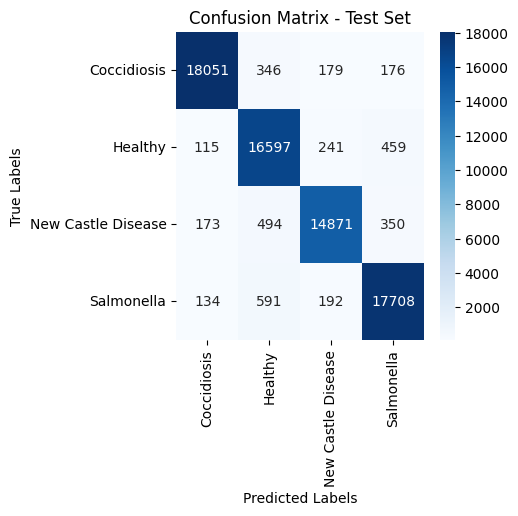

Confusion matrix saved as confusion_matrix.png


In [30]:
# Testing
model.eval()
class_labels = dataset.classes
correct_test = 0
total_test = 0
test_loss = 0.0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

test_accuracy = 100 * correct_test / total_test
print(f"Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%")

# Compute and plot the confusion matrix for the final test set
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(len(class_labels), len(class_labels)))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Test Set")
plt.savefig("resnet18/confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()
print("Confusion matrix saved as confusion_matrix.png")

In [31]:
print(classification_report(true_labels, predicted_labels, target_names=class_labels))

                    precision    recall  f1-score   support

       Coccidiosis       0.98      0.96      0.97     18752
           Healthy       0.92      0.95      0.94     17412
New Castle Disease       0.96      0.94      0.95     15888
        Salmonella       0.95      0.95      0.95     18625

          accuracy                           0.95     70677
         macro avg       0.95      0.95      0.95     70677
      weighted avg       0.95      0.95      0.95     70677

